In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Read csv file
df_orig = pd.read_csv("./online_shoppers_intention.csv")
df = df_orig

In [3]:
df.shape

(12330, 18)

In [4]:
#Quick glance of the top 5 results
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#See what the types of all features are
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
#Check for NULL values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
#Get some baseline info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
#Basic Descriptive Statistics
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
#Let's also consider the Categorical Data
categories = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']

for i in categories:
    print(i)
    print(df[i].value_counts())

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Weekend
Fals

In [10]:
#Declare Feature vectors and target variables

X = df
y = df['Revenue']

In [11]:
#Convert Categorical variables into Integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categories:
    X[i] = le.fit_transform(X[i])

y = le.transform(y)

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>],
       [<AxesSubplot:title={'center':'Browser'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>,
        <AxesSubplot:title={'center':'VisitorType'}>],
       [<AxesSubplot:title={'center':'Weekend'}>,
        <AxesSubplot:title={'center':'Revenue'}>, <Ax

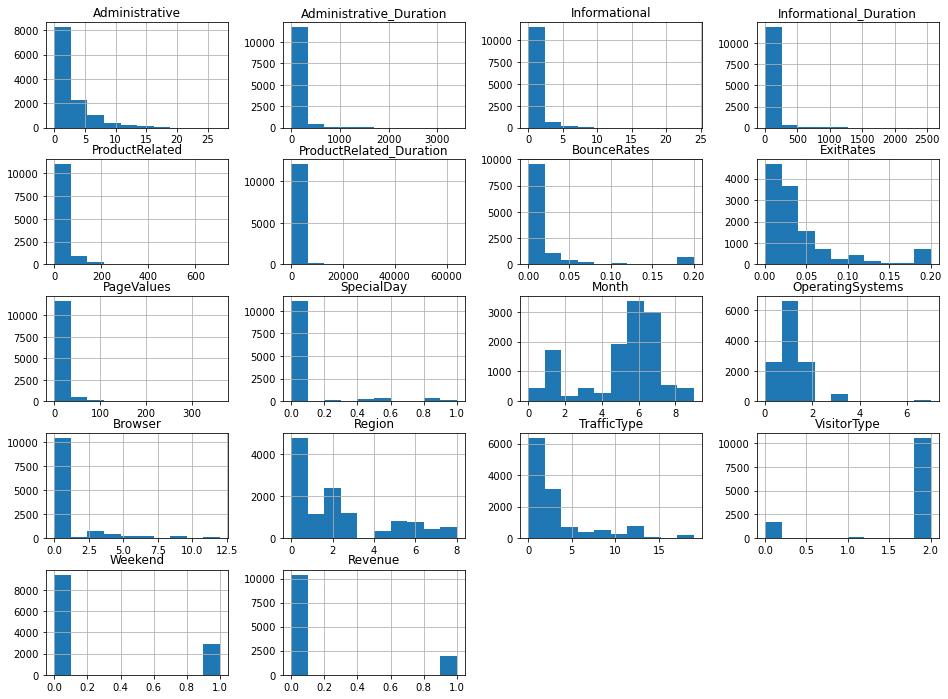

In [12]:
X.hist(figsize = (16,12))

In [13]:
#View the summary of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [14]:
#Preview the converted dataset
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,0,0,0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,1,1,0,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,3,0,8,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,1,1,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,2,2,0,3,2,1,0


In [15]:
# There's a big difference in the magnitude of the data, because K-means clustering is a distance based algorithm
# We need to standardize the data

cols = X.columns

#Standardizing the data

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

#Convert back to a pandas dataframe
X = pd.DataFrame(X, columns=[cols])

# statistics of scaled data
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.085747,0.023779,0.020982,0.013522,0.045009,0.018676,0.110957,0.215364,0.016279,0.061427,0.573777,0.160572,0.113091,0.268421,0.161557,0.859165,0.232603,0.154745
std,0.123029,0.052013,0.052923,0.055209,0.063086,0.029913,0.242442,0.242983,0.051328,0.198917,0.263355,0.130189,0.143106,0.300199,0.211851,0.345379,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002878,0.000000,0.071429,0.000000,0.000000,0.555556,0.142857,0.083333,0.000000,0.052632,1.000000,0.000000,0.000000
50%,0.037037,0.002207,0.000000,0.000000,0.025532,0.009362,0.015562,0.125782,0.000000,0.000000,0.666667,0.142857,0.083333,0.250000,0.052632,1.000000,0.000000,0.000000
75%,0.148148,0.027438,0.000000,0.000000,0.053901,0.022887,0.084063,0.250000,0.000000,0.000000,0.777778,0.285714,0.083333,0.375000,0.157895,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [17]:
#Let's take a look at the results...
kmeans.cluster_centers_

array([[9.16498786e-02, 2.51950473e-02, 2.44217806e-02, 1.59363947e-02,
        4.68530223e-02, 1.90728320e-02, 9.04747732e-02, 1.87742689e-01,
        1.73981512e-02, 5.53695955e-02, 5.87711142e-01, 1.60639570e-01,
        1.02626685e-01, 2.68043933e-01, 1.60702488e-01, 8.31764296e-01,
        1.00000000e+00, 1.73988842e-01],
       [8.39576630e-02, 2.33496840e-02, 1.99394067e-02, 1.27900515e-02,
        4.44502909e-02, 1.85552432e-02, 1.17165182e-01, 2.23736203e-01,
        1.59401587e-02, 6.32635806e-02, 5.69553066e-01, 1.60551982e-01,
        1.16263299e-01, 2.68534665e-01, 1.61816240e-01, 8.67469880e-01,
        1.41830991e-14, 1.48911435e-01]])

In [18]:
#The lower the inertia, the better the model
kmeans.inertia_

8379.37729257223

In [19]:
#Let's check the quality of the labels
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 3778 out of 12330 samples were correctly labeled.


In [20]:
#That's bad... Let's consider the accuracy
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.31


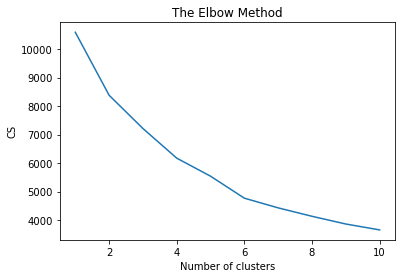

In [21]:
#Let's consider the elbow method for selecting k

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [22]:
#The elbow method suggests that we might have break points at 2, 4, or 6, with 6 being the strongest. Let's look...

count = [2, 4, 6]

for i in count:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    # check how many of the samples were correctly labeled
    labels = kmeans.labels_
    correct_labels = sum(y == labels)
    print("k =", i)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
    print(kmeans.inertia_)
    print("\n")

k = 2
Result: 3778 out of 12330 samples were correctly labeled.
Accuracy score: 0.31
8379.37729257223


k = 4
Result: 1272 out of 12330 samples were correctly labeled.
Accuracy score: 0.10
6170.84903981493


k = 6
Result: 1502 out of 12330 samples were correctly labeled.
Accuracy score: 0.12
4766.102082105093




In [23]:
#Let's consider a model that isolates behaviors and ignores factors like Operating System, Region, etc...

#First, let's drop the columns we're no longer interested in..
X2 = X

X2.drop(['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'], axis=1, inplace=True)

C:\Users\Drew\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


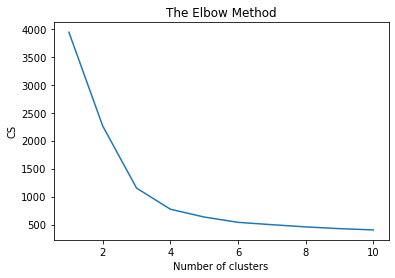

In [24]:
#Let's consider the elbow method for selecting k

cs = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X2)
    cs.append(km.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [25]:
#The elbow method suggests clear breakpoints at 3, and maybe 4

count = [3, 4]

for i in count:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X2)
    # check how many of the samples were correctly labeled
    labels = km.labels_
    correct_labels = sum(y == labels)
    print("k =", i)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
    print(kmeans.inertia_)
    print("\n")

k = 3
Result: 9497 out of 12330 samples were correctly labeled.
Accuracy score: 0.77
4766.102082105093


k = 4
Result: 10528 out of 12330 samples were correctly labeled.
Accuracy score: 0.85
4766.102082105093




In [26]:
#Let's visualize using 4 clusters

from sklearn.decomposition import PCA

pca = PCA(2)
 
#Transform the data
df2 = pca.fit_transform(X2)
 
df2.shape

(12330, 2)

In [27]:
#Initialize the class object
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 
#predict the labels of clusters.
label = km.fit_predict(df2)
 
print(label)

[2 3 2 ... 3 0 0]


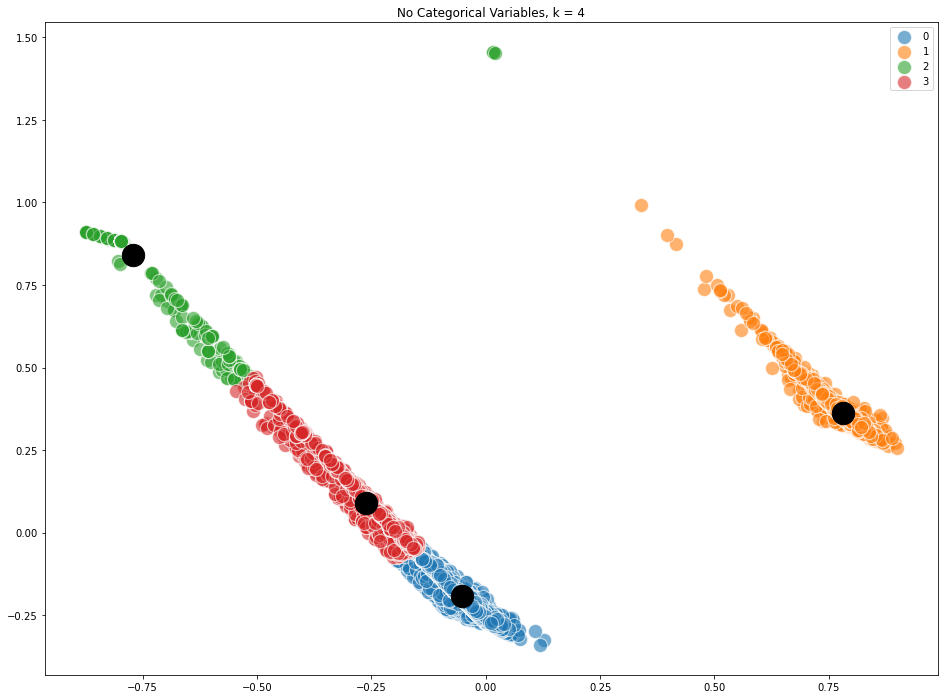

In [28]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)

 
#plotting the results:

plt.figure(figsize=(16,12))
for i in u_labels:
    sns.scatterplot(x = df2[label == i , 0] , y = df2[label == i , 1], label = i, alpha = .6, s = 200)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 500, color = 'k')
plt.legend()
plt.title("No Categorical Variables, k = 4")
plt.show()

In [29]:
#Repeat visualization for all variables

df3 = pca.fit_transform(X)
 
df3.shape

(12330, 2)

In [30]:
#Initialize the class object
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df3)
 
print(label)

[0 0 0 ... 0 0 0]


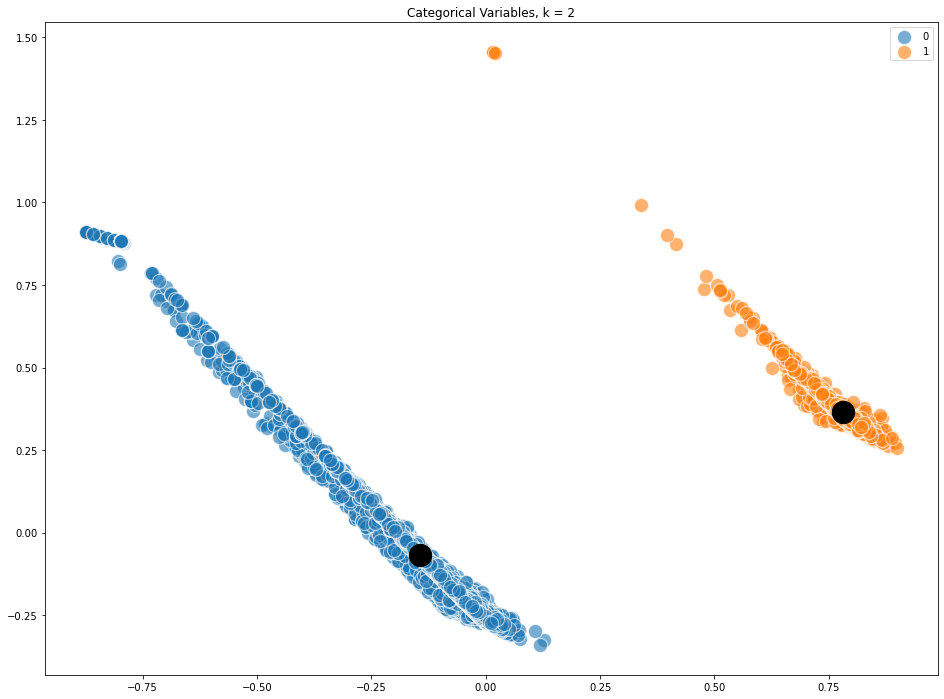

In [31]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

 
#plotting the results:

plt.figure(figsize=(16,12))
for i in u_labels:
    sns.scatterplot(x = df3[label == i , 0] , y = df3[label == i , 1], label = i, alpha = .6, s = 200)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 500, color = 'k')
plt.legend()
plt.title("Categorical Variables, k = 2")
plt.show()

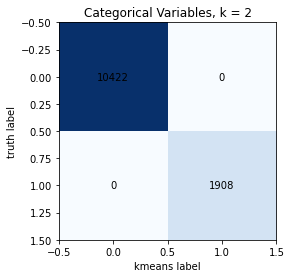

In [32]:
#Let's consider how effective both methods were at predicting whether a purchase was made..


#First with all categories...

# Prep
truth = y
data  = X

# Kmeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

# Prep
k_labels = kmeans.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
    k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]
    
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth, k_labels_matched)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.title("Categorical Variables, k = 2")
plt.show()

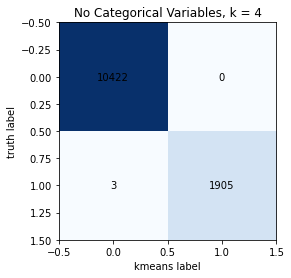

In [33]:
#Now without categorical

# Prep
truth = y
data  = X2

# Kmeans
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(X2)

# Prep
k_labels = km.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
    k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]
    
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth, k_labels_matched)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.title("No Categorical Variables, k = 4")
plt.show()